# Bài tập

Sử dụng 1 bộ dữ liệu time-series bất kì (1 biến hoặc nhiều biến).
tại link (https://github.com/thieu1995/csv-files/).

Chọn một model regression bất kì trên scikit-learn (https://scikit-learn.org/stable/search.html?q=regression)

Áp dụng các kĩ thuật trên lớp vào bộ dữ liệu time-series trên.

1. Scaling, (1 điểm)

2. Building, (1 điểm)

3. Hyper-parameter tuning, (2 điểm)

4. Pipeline, (1 điểm)

5. GridsearchCV, (1 điểm)

6. Forecasting, (1 điểm)

7. Calculate Metrics ví dụ như RMSE, MSE, MAE, MAPE (2 điểm)

8. Vẽ đồ thị giá trị thực tế và dự đoán (1 điểm)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/thieu1995/csv-files/main/data/timeseries/univariate/acea-water-prediction/Aquifer_Doganella.csv')
df.head()

,Date,Rainfall_Monteporzio,Rainfall_Velletri,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_2,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Depth_to_Groundwater_Pozzo_5,Depth_to_Groundwater_Pozzo_6,Depth_to_Groundwater_Pozzo_7,...,Volume_Pozzo_1,Volume_Pozzo_2,Volume_Pozzo_3,Volume_Pozzo_4,Volume_Pozzo_5+6,Volume_Pozzo_7,Volume_Pozzo_8,Volume_Pozzo_9,Temperature_Monteporzio,Temperature_Velletri
0,01/01/2004,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.30,8.60
1,02/01/2004,0.2,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.70,6.25
2,03/01/2004,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.40,9.80
3,04/01/2004,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.35,5.95
4,05/01/2004,0.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.60,5.85


In [7]:
series = df['Rainfall_Monteporzio']
series

0       0.0
1       0.2
2       0.0
3       0.0
4       0.2
       ... 
6021    0.0
6022    0.0
6023    0.0
6024    0.0
6025    0.0
Name: Rainfall_Monteporzio, Length: 6026, dtype: float64

In [8]:
dataset = series_to_supervised(pd.DataFrame(series), n_in=6, n_out=1)
dataset.head()

,var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
6,0.0,0.2,0.0,0.0,0.2,0.0,0.0
7,0.2,0.0,0.0,0.2,0.0,0.0,1.8
8,0.0,0.0,0.2,0.0,0.0,1.8,13.2
9,0.0,0.2,0.0,0.0,1.8,13.2,0.0
10,0.2,0.0,0.0,1.8,13.2,0.0,0.0


In [9]:
y = dataset['var1(t)']
X = dataset.drop(columns=['var1(t)'])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
from sklearn.preprocessing import StandardScaler

In [12]:
data_scaler = StandardScaler()
X_train_scaled = data_scaler.fit_transform(X_train)
X_test_scaled = data_scaler.transform(X_test)

label_scaler = StandardScaler()
y_train_scaled = label_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = label_scaler.transform(y_test.values.reshape(-1, 1))

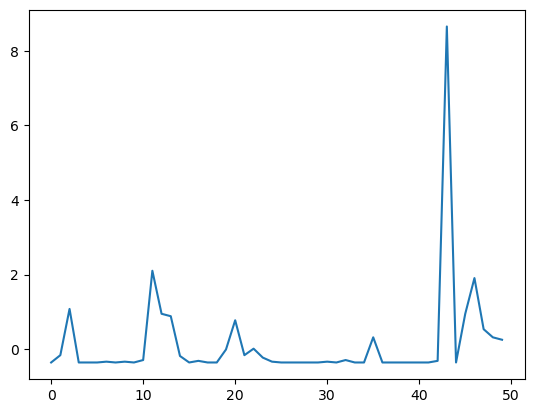

In [21]:
plt.plot(y_train_scaled[:50])

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
estimator = RandomForestRegressor(n_estimators=100, random_state=42)

estimator.fit(X_train_scaled, y_train_scaled)

/var/folders/vq/zq0yknjj0sn2jy9pm9md1_tw0000gn/T/ipykernel_67947/1945662938.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train_scaled, y_train_scaled)


RandomForestRegressor(random_state=42)

In [24]:
y_pred = estimator.predict(X_test_scaled)

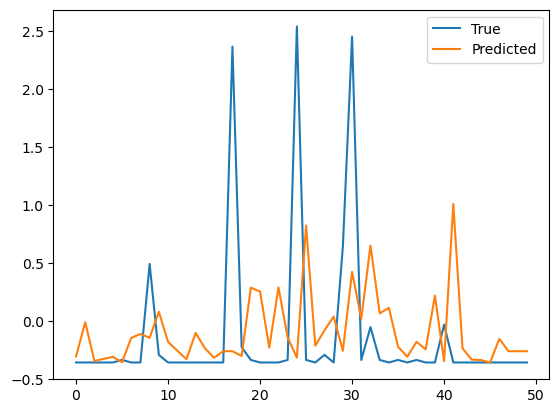

In [26]:
# Draw the plot
plt.plot(y_test_scaled[-50:], label='True')
plt.plot(y_pred[-50:], label='Predicted')
plt.legend()

In [27]:
from sklearn.model_selection import GridSearchCV

In [31]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [32]:
y_train_scaled = y_train_scaled.ravel()
y_test_scaled = y_test_scaled.ravel()

steps = [('scaler', StandardScaler()), ('SVR', SVR())]
pipeline = Pipeline(steps)

parameteres = {
    'SVR__C': [0.1, 1, 10, 1000],
    'SVR__epsilon': [0.1, 0.5, 1.0],
    'SVR__kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

grid_search = GridSearchCV(pipeline, param_grid=parameteres, cv=5, n_jobs=-1, verbose=3)

grid_search.fit(X_train_scaled, y_train_scaled)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/tripercy/miniconda3/envs/machine_learning_env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumP

[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=-0.011 total time=   0.7s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=-0.009 total time=   0.7s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=0.011 total time=   0.7s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=-0.023 total time=   0.7s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=-0.035 total time=   0.7s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=rbf;, score=-0.038 total time=   0.7s
[CV 3/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=-0.023 total time=   0.8s
[CV 2/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=0.006 total time=   0.9s
[CV 4/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=-0.005 total time=   0.6s
[CV 5/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=linear;, score=-0.016 total time=   0.8s
[CV 1/5] END SVR__C=0.1, SVR__epsilon=0.1, SVR__kernel=si

KeyboardInterrupt: 